In [14]:
%matplotlib inline
import pandas as pd

In [15]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [16]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Angels' Shepherd,2015
1,Noiva da Noite - o Desejo de 7 Homens,1974
2,To the Flame,2017
3,Cao mang die xie ji,1966
4,Funkytown,2011


In [13]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [32]:
c = cast.copy()
#c = c[c.character.str.contains(any(('superman', 'batman')), case = False)]
#c.shape
#c = c[any(('superman', 'batman')).isin(c.character.str())]
#c = c[c.character.str.contains('superman', case = False) | c.character.str.contains('batman', case = False)]
#c = c[c.character.str.contains(r'superman|batman', case = False)]
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c.head()

,title,year,name,type,character,n
941,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1
15196,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,1
15222,Justice League Part Two,2019,Ben Affleck,actor,Batman,NaN
15238,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN
15244,The Justice League Part One,2017,Ben Affleck,actor,Batman,NaN


In [45]:
groups = c.groupby(['year', 'character'])
g = groups.size().unstack()
g.fillna(0, inplace = True)
g.head()
# g[g.Superman > g.Batman]
diff = g.Superman - g.Batman
diff[diff > 0].size

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [46]:
diff[diff < 0].size

23

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

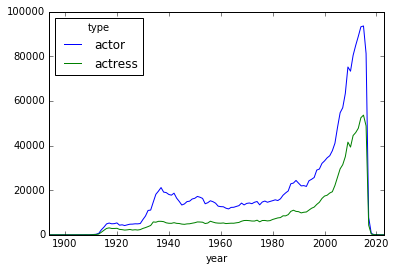

In [105]:
c = cast.copy()
groups = c.groupby(['year', 'type'])
g = groups.size().unstack('type')
g = g.fillna(0)
#g.plot(kind = 'bar', figsize= (9, 6))
g.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

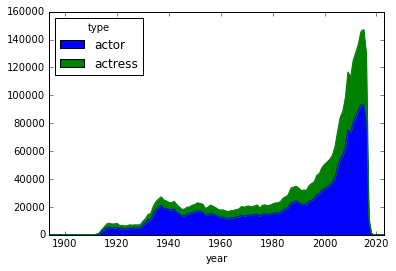

In [73]:
g.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

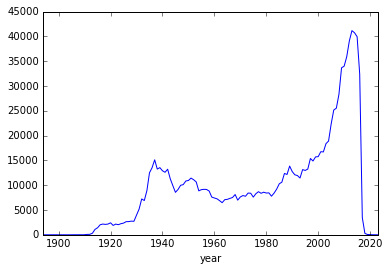

In [88]:
c = cast.copy()
groups = c.groupby(['year', 'type'])
g = groups.size().unstack('type')
g = g.fillna(0)
#g.plot(kind = 'bar', figsize= (9, 6))
#g.plot()
g.loc[:, 'diff'] = g.actor - g.actress
#g.plot(x= "type")
g["diff"].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

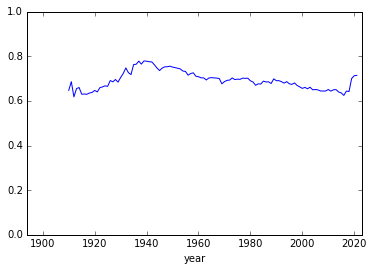

In [95]:
c = cast.copy()
groups = c.groupby(['year', 'type'])
g = groups.size().unstack('type')
#g = g.fillna(0)
(g.actor/(g.actor + g.actress)).plot(ylim = [0, 1])
#g.actor/(g.actor + g.actress)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

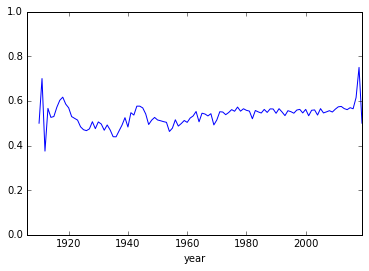

In [96]:
c = cast[cast.n == 2].copy()
groups = c.groupby(['year', 'type'])
g = groups.size().unstack('type')
#g = g.fillna(0)
(g.actor/(g.actor + g.actress)).plot(ylim = [0, 1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

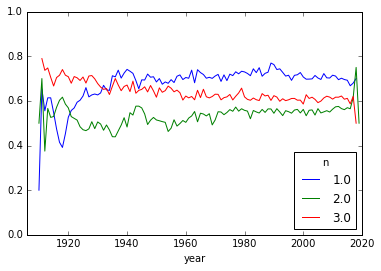

In [124]:
c = cast[cast.n.isin([1,2,3])].copy()
groups = c.groupby(['year', 'n', 'type'])
g = groups.size().unstack('type')
g.loc[:, 'ratio'] = g.actor/(g.actor + g.actress)
g = g['ratio'].unstack('n')
g.plot(ylim = [0, 1])